In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import rasterio

import os
import sys
module_path = os.path.abspath(os.path.join('../../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/home/edgaregurrola/Repos/observatorio-ciudades/accesibilidad-urbana/aup/data.py:24: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(


In [2]:
from scipy.stats import mode 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_samples, silhouette_score

In [3]:
from sklearn.model_selection import train_test_split

In [8]:
processed_table = 'santiago_unidadesvecinales_hqsl_4_5_kmh'
gdf = aup.gdf_from_db(processed_table, 'projects_research')
print(gdf.shape)
gdf.head(2)

(1088, 275)


,NOMBRE_REG,CODIGO_REG,NOMBRE_COM,CUT,NOMBRE_UV,CODIGO_UV,PORC_VIV,COD_UNICO_,PERSONAS,HOMBRE,...,culture_count,greenspace_count,entertainment_count,enjoying_count,education_count,learning_count,workplaces_count,sustainable_mobility_count,working_count,hqsl
0,METROPOLITANA DE SANTIAGO,13,SANTIAGO,13101,1,1,100.0,13101_1,4198,2125,...,34.641814,8.445386,28.359327,9.085061,43.581838,5.559616,6.211292,28.835471,7.144437,42.558339
1,METROPOLITANA DE SANTIAGO,13,SANTIAGO,13101,10,10,100.0,13101_10,5009,2439,...,6.912039,7.555781,8.876800,2.918078,42.068591,5.258574,7.007268,20.664400,5.534334,28.390983


In [4]:
gdf = gpd.read_file('../../../data/processed/santiago/santiago_unidadesvecinales_hqsl_4_5_kmh_utm.gpkg')
print(gdf.shape)
gdf.head(2)

(1074, 276)


,NOMBRE_REG,CODIGO_REG,NOMBRE_COM,CUT,NOMBRE_UV,CODIGO_UV,PORC_VIV,COD_UNICO_,PERSONAS,HOMBRE,...,entertainment_count,enjoying_count,education_count,learning_count,workplaces_count,sustainable_mobility_count,working_count,hqsl,area_ha,geometry
0,METROPOLITANA DE SANTIAGO,13,SANTIAGO,13101,1,1,100.0,13101_1,4198,2125,...,28.359327,9.085061,43.581838,5.559616,6.211292,28.835471,7.144437,42.558339,33.905364,"POLYGON ((347955.391 6299217.045, 347957.500 6..."
1,METROPOLITANA DE SANTIAGO,13,SANTIAGO,13101,10,10,100.0,13101_10,5009,2439,...,8.876800,2.918078,42.068591,5.258574,7.007268,20.664400,5.534334,28.390983,22.810436,"POLYGON ((344106.286 6300161.096, 344106.508 6..."


In [5]:
source_list = ['supermercado','clinica_priv','clinica_pub',
                   'hospital_priv','hospital_pub',
                   'consult_ado_priv','consult_ado_pub',
                   'club_deportivo','eq_deportivo_pub','eq_deportivo_priv',
                   'tax_collection','civic_office','social_security',
                   'museos_priv','museos_pub','sitios_historicos',
                   'cines','edu_basica_priv',
                   'edu_basica_pub','edu_media_priv','edu_media_pub',
                   'jardin_inf_priv','jardin_inf_pub','edu_especial_priv',
                   'edu_especial_pub','bibliotecas','agua_alcantarillado',
                   'residencia_adumayor','paradas_tp','paradas_tp_tren',
                   'paradas_tp_metro', 'banco','carniceria','farmacia',
                   'hogar', 'librerias','local_mini_market','bakeries',
                   'restaurantes_bar_cafe', 'universidad', 'edu_tecnica',
                   'edu_adultos_priv','edu_adultos_pub','centro_edu_amb',
                   'centro_recyc', 'labs_priv', 'salud_mental', 'bomberos',
                   'correos', 'police', 'vacunatorio_pub', 'vacunatorio_priv',
                   'eleam', 'ferias', 'ciclovias','ep_plaza_small','ep_plaza_big',
               'ndvi_count', 'hotel_count', 'viv_count','viv_social_count',
              'working','caring','learning','supplying','enjoying','living',
              'hqsl']

In [6]:
col_analysis = []

for source in source_list:
    if source == 'hqsl':
        col_analysis.append(source)
        
    for col in gdf.columns:
        if source in col and '_time' in col:
            col_analysis.append(col)
        if source in col and '_count' in col and 'scaled' not in col:
            col_analysis.append(col)

col_analysis.append('PERSONAS')
col_analysis = list(set(col_analysis))
# col_analysis

## K-means model

Fill missing values

In [7]:
gdf = gdf.fillna(0)

Data to numpy array

In [8]:
data = gdf[col_analysis].to_numpy()

Standarize data

In [9]:
scaler = StandardScaler()

data = scaler.fit_transform(data)

Split data

In [11]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(data, gdf[['hqsl']].to_numpy(), test_size = 0.15)

### Model

{4: 0.11590753729561809, 5: 0.10350169201280843, 6: 0.094821213103463, 7: 0.08523129942976741, 8: 0.07779159375306927, 9: 0.08017847517027474, 10: 0.08100232439823389, 11: 0.08945778022735261, 12: 0.08107796745388685, 13: 0.07971901469998605, 14: 0.08709271294848481, 15: 0.0892077982753905, 16: 0.08488086507319807, 17: 0.0836277613784145, 18: 0.08802182334347097, 19: 0.10135168018763656, 20: 0.10520112021931598, 21: 0.10733789497175182, 22: 0.10285936016237023, 23: 0.10438581075344791, 24: 0.10186310710393229, 25: 0.1089326626979194, 26: 0.1027252622601481, 27: 0.11407742580701512, 28: 0.11315746819810006, 29: 0.11464617557766893, 30: 0.113576100602541, 31: 0.11514410677046351, 32: 0.11616588981064946, 33: 0.11641478814794659, 34: 0.11897858947424876, 35: 0.12100174500832614, 36: 0.11888630562617797, 37: 0.11337551846843097, 38: 0.11729479663122579, 39: 0.11559158997944327, 40: 0.11919753641594971, 41: 0.11916546337783404, 42: 0.11994631026801525, 43: 0.1209439307788834, 44: 0.12309820

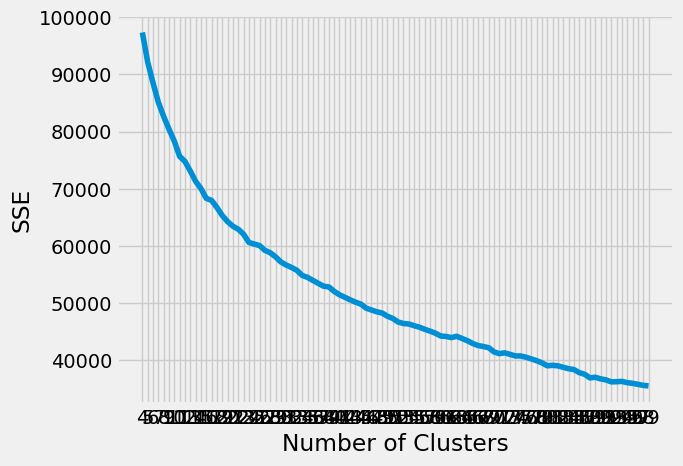

In [12]:
# Elbow curve to find optimal K 
kmeans_kwargs = {
    "init": "random",
    "n_init": 30,
    "max_iter": 300,
    "random_state": 42,
}

sse = []
silhouette_avg = {}
start_kmeans = 4
end_kmeans = 100

for k in range(start_kmeans, end_kmeans):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    cluster_labels = kmeans.fit_predict(data)
    sse.append(kmeans.inertia_)
    silhouette_avg[k] = silhouette_score(data, cluster_labels)
    # print(k,silhouette_score(data, cluster_labels))
    

print(silhouette_avg)

plt.style.use("fivethirtyeight")
plt.plot(range(start_kmeans, end_kmeans), sse)
plt.xticks(range(start_kmeans, end_kmeans))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Plot data

In [13]:
# 9 categorías de zonificación

kmeans = KMeans(
    init="random",
    n_clusters=20,
    n_init=30,
    max_iter=300,
    random_state=42
)
clusters = kmeans.fit_predict(data) 
clusters

array([10,  1,  1, ...,  9, 17,  7], dtype=int32)

<AxesSubplot: >

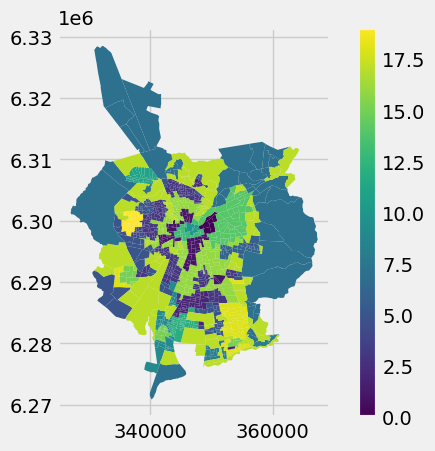

In [14]:
gdf['cluster'] = clusters
gdf.plot('cluster', legend=True)

Statistics

In [17]:
col_cluster = col_analysis
col_cluster.append('cluster')
col_cluster = list(set(col_cluster))

for c in gdf[col_cluster].columns:
    if gdf[c].dtypes == 'object':
        gdf[c] =  gdf[c].astype('float64')

In [18]:

gdf[col_cluster].groupby('cluster').mean()

,edu_basica_pub_count_15min,correos_time,eq_deportivo_priv_count_15min,vacunatorio_pub_time,labs_priv_count_15min,police_time,edu_adultos_pub_time,eq_deportivo_pub_count_15min,clinica_pub_count_15min,correos_count_15min,...,salud_mental_time,restaurantes_bar_cafe_time,farmacia_time,bomberos_time,vacunatorio_pub_count_15min,jardin_inf_pub_count_15min,edu_especial_priv_time,eleam_count_15min,jardin_inf_priv_count_15min,consult_ado_pub_time
cluster,,,,,,,,,,,,,,,,,,,,,
0,3.930671,10.484612,4.304368,18.737291,0.606983,13.202847,16.650276,0.750005,0.873938,1.346372,...,20.783793,1.896231,2.525935,13.195647,0.325842,0.570472,43.578874,3.717875,1.624095,16.541903
1,7.326215,17.639528,2.780329,74.591581,0.329248,12.638655,11.798226,4.313120,0.866740,0.385793,...,26.266987,3.701906,5.250175,14.238296,0.001000,2.431284,49.880010,2.137349,1.346722,66.346978
2,8.204725,15.374264,5.815624,182.449804,0.002059,15.556778,8.506351,14.072451,2.169876,0.598321,...,15.615109,9.140365,9.501302,11.568371,0.001000,4.629003,167.443616,0.788089,1.118982,122.327759
3,7.371200,26.716758,4.291111,124.085343,0.001000,15.575888,13.766325,8.691129,1.932302,0.134583,...,22.064728,9.435772,9.248279,14.711215,0.001000,4.642882,96.411807,0.563148,0.296460,105.734895
4,6.611245,26.290865,6.252984,150.661284,0.001000,11.116862,13.689194,8.143763,2.466731,0.081569,...,15.935832,9.016847,7.115101,17.868558,0.001000,4.131214,109.808630,0.000000,0.086298,146.009515
5,5.213325,37.220954,3.632178,158.802606,0.001000,20.695241,17.913017,7.906778,1.135063,0.011284,...,29.434380,10.636096,10.703362,21.251889,0.001000,4.256772,130.785909,0.061785,0.564512,138.128146
6,5.660471,24.528509,4.707016,97.293197,0.001000,14.195872,11.188643,6.573758,1.824345,0.242272,...,14.413894,8.120444,9.057673,25.011275,0.001000,4.896563,53.434659,1.296361,0.754943,46.617834
7,0.236332,29.273806,1.000926,124.628273,0.008706,28.692176,30.034470,0.279418,0.173961,0.047584,...,33.694892,9.453416,11.464360,26.512653,0.001000,0.149616,111.913679,0.336225,0.460403,105.213898
8,4.839179,52.734155,0.711495,277.441265,0.001000,17.252956,14.927704,11.896085,1.142655,0.001000,...,51.485799,27.441680,16.630157,37.541194,0.001000,4.529033,263.670120,0.231275,0.012961,203.545387


In [19]:
gdf[col_cluster].groupby('cluster').std()

,edu_basica_pub_count_15min,correos_time,eq_deportivo_priv_count_15min,vacunatorio_pub_time,labs_priv_count_15min,police_time,edu_adultos_pub_time,eq_deportivo_pub_count_15min,clinica_pub_count_15min,correos_count_15min,...,salud_mental_time,restaurantes_bar_cafe_time,farmacia_time,bomberos_time,vacunatorio_pub_count_15min,jardin_inf_pub_count_15min,edu_especial_priv_time,eleam_count_15min,jardin_inf_priv_count_15min,consult_ado_pub_time
cluster,,,,,,,,,,,,,,,,,,,,,
0,1.313813,5.478629,1.208808,7.850005,0.879673,6.750954,6.248820,0.852359,0.633749,1.033019,...,5.862921,0.475428,0.624390,3.495885,0.304889,0.612713,5.965658,2.568709,1.464868,6.049410
1,2.164487,8.065317,1.768932,25.231074,0.591495,4.928615,5.242405,2.696848,0.672146,0.444754,...,9.799824,1.590610,2.018428,5.308806,0.000000,1.170374,21.699546,1.452998,1.383275,21.556606
2,1.933521,8.747991,2.399719,30.267487,0.007412,5.547932,3.074115,6.369968,0.822154,0.522538,...,7.069683,4.376267,3.994134,4.365332,0.000000,1.811068,27.142327,0.428346,0.718905,23.909191
3,2.065828,10.378313,3.235252,22.348432,0.000000,6.547792,6.669944,4.198775,0.766346,0.278833,...,10.765788,4.228490,4.242996,5.935876,0.000000,1.691687,23.382851,0.755838,0.493819,28.668608
4,1.942627,8.191221,3.532025,16.487303,0.000000,3.939670,5.075659,2.137827,1.038552,0.195924,...,6.759946,2.879562,2.820317,5.582205,0.000000,1.118932,22.888158,0.000000,0.159634,34.296372
5,2.205487,11.036311,3.041138,36.307170,0.000000,6.988575,9.921200,5.039385,0.774741,0.040188,...,12.991110,4.022627,3.977281,7.871820,0.000000,2.353651,41.914121,0.173570,0.554364,25.607371
6,1.481173,12.786936,1.163331,16.114466,0.000000,4.179813,4.964227,4.575310,0.788439,0.326301,...,6.547164,2.495024,3.291248,7.572746,0.000000,1.615594,13.158298,2.174961,0.528717,14.523127
7,0.260013,10.921198,1.386953,35.673951,0.025814,11.163079,10.613465,0.469165,0.338170,0.114504,...,10.390182,3.472241,5.733611,7.443880,0.000000,0.239829,31.618016,0.863956,0.545921,34.377806
8,2.169281,12.763444,0.750980,20.464701,0.000000,8.710227,13.000481,5.896245,1.068452,0.000000,...,13.561541,9.828051,10.396576,15.960067,0.000000,2.456226,22.447840,0.291424,0.056497,18.194237


In [20]:
gdf[col_cluster].groupby('cluster').count()

,edu_basica_pub_count_15min,correos_time,eq_deportivo_priv_count_15min,vacunatorio_pub_time,labs_priv_count_15min,police_time,edu_adultos_pub_time,eq_deportivo_pub_count_15min,clinica_pub_count_15min,correos_count_15min,...,salud_mental_time,restaurantes_bar_cafe_time,farmacia_time,bomberos_time,vacunatorio_pub_count_15min,jardin_inf_pub_count_15min,edu_especial_priv_time,eleam_count_15min,jardin_inf_priv_count_15min,consult_ado_pub_time
cluster,,,,,,,,,,,,,,,,,,,,,
0,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
1,58,58,58,58,58,58,58,58,58,58,...,58,58,58,58,58,58,58,58,58,58
2,49,49,49,49,49,49,49,49,49,49,...,49,49,49,49,49,49,49,49,49,49
3,185,185,185,185,185,185,185,185,185,185,...,185,185,185,185,185,185,185,185,185,185
4,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
5,85,85,85,85,85,85,85,85,85,85,...,85,85,85,85,85,85,85,85,85,85
6,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
7,42,42,42,42,42,42,42,42,42,42,...,42,42,42,42,42,42,42,42,42,42
8,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19


In [21]:
import seaborn as sns

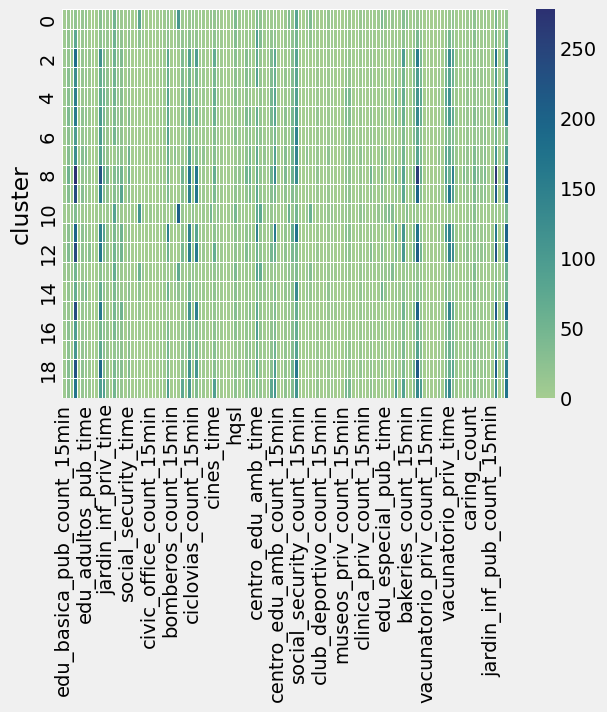

In [22]:
sns.heatmap(gdf[col_cluster].drop(columns=['PERSONAS']).groupby('cluster').mean(), 
            annot=False,fmt=".2f", linewidth=.5, cmap="crest")
sns.set (rc = {'figure.figsize':(20,20)})

In [24]:
gdf.to_file('../../../data/processed/santiago/santiago_unidadesvecinales_cluster_hqsl_4_5_kmh_utm.gpkg')